# PURPOSE OF THIS NOTEBOOK:
Analyze and determine how much of a gap there is between Max and his second teammate since 2022. This will test my hypothesis that the issues that Checo were facing were a car issue and not an issue of his skill. 

In [22]:
import pandas as pd
import numpy as np
import fastf1
import fastf1.plotting
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [48]:
# Setting consistant variables
year = 2025
wknd = 1
ses = 'R'
VER = 'VER'
LAW = 'LAW'
colormap = mpl.cm.plasma

In [62]:
# Doing a test run to plot 
session = fastf1.get_session(year, wknd, ses)
session.load()
weekend = session.event

MaxLap = session.laps.pick_drivers(VER).pick_fastest()
LawLap = session.laps.pick_drivers(LAW).pick_fastest()

# Get the telemetry for max
VER_x = MaxLap.telemetry['X']
VER_y = MaxLap.telemetry['Y']
VER_color = MaxLap.telemetry['Speed']

# Get telemetry for liam
LAW_x = LawLap.telemetry['X']
LAW_y = LawLap.telemetry['Y']
LAW_color = LawLap.telemetry['Speed']

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', 

In [50]:
VER_points = np.array([VER_x, VER_y]).T.reshape(-1, 1, 2)
VER_segments = np.concatenate([VER_points[:-1]], axis=1)

LAW_points = np.array([LAW_x, LAW_y]).T.reshape(-1, 1, 2)
LAW_segments = np.concatenate([LAW_points[:-1]], axis=1)

In [55]:
# Turn it into a function:
def plot_fastest_lap(segments, lap, color, weekend, driver):
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
            color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm,
                        linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                    orientation="horizontal")


    # Show the plot
    plt.show()

In [60]:
norm = plt.Normalize(VER_color.min(), VER_color.max())

In [61]:
norm

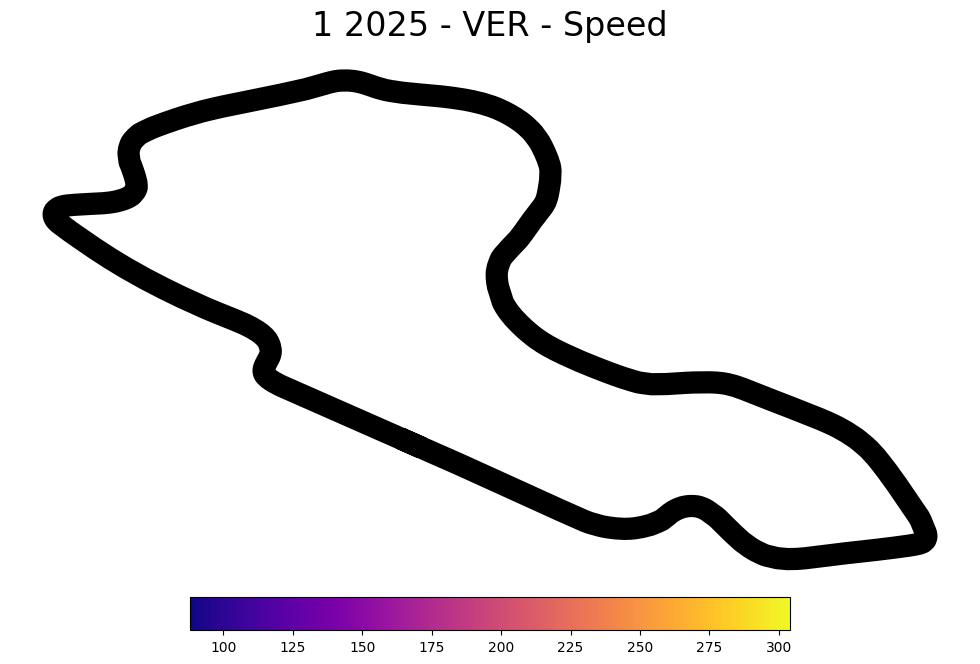

In [56]:
# Plot Max's lap
plot_fastest_lap(VER_segments, MaxLap, VER_color, weekend, VER)

In [63]:
MaxLap

Time                      0 days 02:28:07.323000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:23.081000
LapNumber                                   43.0
Stint                                        5.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.878000
Sector2Time               0 days 00:00:18.569000
Sector3Time               0 days 00:00:35.634000
Sector1SessionTime        0 days 02:27:13.176000
Sector2SessionTime        0 days 02:27:31.745000
Sector3SessionTime        0 days 02:28:07.379000
SpeedI1                                    278.0
SpeedI2                                    298.0
SpeedFL                                    293.0
SpeedST                                    297.0
IsPersonalBest                              True
Compound                                  MEDIUM
TyreLife            